## PART- A: Setup & Load

In [1]:
## importing necessary liabraries  
import re, os,warnings
from pathlib import Path
import json
import math
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")
##Output folder
OUTDIR = Path("output")
OUTDIR.mkdir(exist_ok=True)
## Display settings
pd.set_option("display.max_columns", 220)
pd.set_option("display.width", 140)
print("Output dir:", OUTDIR.resolve())

Output dir: C:\Users\asus\output


In [2]:
## Load the csv and check basic 
CSV = "dex-temp-db.score_v4.csv"
df = pd.read_csv(CSV, low_memory=False)
print("Loaded:", CSV, "shape:", df.shape)
print("\nColumns available:", df.columns.tolist())
df.head()

Loaded: dex-temp-db.score_v4.csv shape: (44975, 396)

Columns available: ['_id', 'wallet_id', 'lp_scores[0].pool_id', 'lp_scores[1].pool_id', 'lp_scores[2].pool_id', 'lp_scores[3].pool_id', 'lp_scores[4].pool_id', 'lp_scores[5].pool_id', 'lp_scores[6].pool_id', 'lp_scores[7].pool_id', 'lp_scores[8].pool_id', 'lp_scores[9].pool_id', 'lp_scores[10].pool_id', 'lp_scores[11].pool_id', 'lp_scores[12].pool_id', 'lp_scores[0].pool_name', 'lp_scores[1].pool_name', 'lp_scores[2].pool_name', 'lp_scores[3].pool_name', 'lp_scores[4].pool_name', 'lp_scores[5].pool_name', 'lp_scores[6].pool_name', 'lp_scores[7].pool_name', 'lp_scores[8].pool_name', 'lp_scores[9].pool_name', 'lp_scores[10].pool_name', 'lp_scores[11].pool_name', 'lp_scores[12].pool_name', 'lp_scores[0].timestamp', 'lp_scores[1].timestamp', 'lp_scores[2].timestamp', 'lp_scores[3].timestamp', 'lp_scores[4].timestamp', 'lp_scores[5].timestamp', 'lp_scores[6].timestamp', 'lp_scores[7].timestamp', 'lp_scores[8].timestamp', 'lp_scores[9].ti

,_id,wallet_id,lp_scores[0].pool_id,lp_scores[1].pool_id,lp_scores[2].pool_id,lp_scores[3].pool_id,lp_scores[4].pool_id,lp_scores[5].pool_id,lp_scores[6].pool_id,lp_scores[7].pool_id,lp_scores[8].pool_id,lp_scores[9].pool_id,lp_scores[10].pool_id,lp_scores[11].pool_id,lp_scores[12].pool_id,lp_scores[0].pool_name,lp_scores[1].pool_name,lp_scores[2].pool_name,lp_scores[3].pool_name,lp_scores[4].pool_name,lp_scores[5].pool_name,lp_scores[6].pool_name,lp_scores[7].pool_name,lp_scores[8].pool_name,lp_scores[9].pool_name,lp_scores[10].pool_name,lp_scores[11].pool_name,lp_scores[12].pool_name,lp_scores[0].timestamp,lp_scores[1].timestamp,lp_scores[2].timestamp,lp_scores[3].timestamp,lp_scores[4].timestamp,lp_scores[5].timestamp,lp_scores[6].timestamp,lp_scores[7].timestamp,lp_scores[8].timestamp,lp_scores[9].timestamp,lp_scores[10].timestamp,lp_scores[11].timestamp,lp_scores[12].timestamp,lp_scores[0].fee_tier,lp_scores[1].fee_tier,lp_scores[2].fee_tier,lp_scores[3].fee_tier,lp_scores[4].fee_tier,lp_scores[5].fee_tier,lp_scores[6].fee_tier,lp_scores[7].fee_tier,lp_scores[8].fee_tier,lp_scores[9].fee_tier,lp_scores[10].fee_tier,lp_scores[11].fee_tier,lp_scores[12].fee_tier,lp_scores[0].tvl,lp_scores[1].tvl,lp_scores[2].tvl,lp_scores[3].tvl,lp_scores[4].tvl,lp_scores[5].tvl,lp_scores[6].tvl,lp_scores[7].tvl,lp_scores[8].tvl,lp_scores[9].tvl,lp_scores[10].tvl,lp_scores[11].tvl,lp_scores[12].tvl,lp_scores[0].token_symbols[0],lp_scores[0].token_symbols[1],lp_scores[1].token_symbols[0],lp_scores[1].token_symbols[1],lp_scores[2].token_symbols[0],lp_scores[2].token_symbols[1],lp_scores[3].token_symbols[0],lp_scores[3].token_symbols[1],lp_scores[4].token_symbols[0],lp_scores[4].token_symbols[1],lp_scores[5].token_symbols[0],lp_scores[5].token_symbols[1],lp_scores[6].token_symbols[0],lp_scores[6].token_symbols[1],lp_scores[7].token_symbols[0],lp_scores[7].token_symbols[1],lp_scores[8].token_symbols[0],lp_scores[8].token_symbols[1],lp_scores[9].token_symbols[0],lp_scores[9].token_symbols[1],lp_scores[10].token_symbols[0],lp_scores[10].token_symbols[1],lp_scores[11].token_symbols[0],lp_scores[11].token_symbols[1],lp_scores[12].token_symbols[0],lp_scores[12].token_symbols[1],lp_scores[0].score_breakdown.deposit_volume_score,lp_scores[1].score_breakdown.deposit_volume_score,lp_scores[2].score_breakdown.deposit_volume_score,lp_scores[3].score_breakdown.deposit_volume_score,lp_scores[4].score_breakdown.deposit_volume_score,lp_scores[5].score_breakdown.deposit_volume_score,lp_scores[6].score_breakdown.deposit_volume_score,lp_scores[7].score_breakdown.deposit_volume_score,lp_scores[8].score_breakdown.deposit_volume_score,lp_scores[9].score_breakdown.deposit_volume_score,lp_scores[10].score_breakdown.deposit_volume_score,lp_scores[11].score_breakdown.deposit_volume_score,lp_scores[12].score_breakdown.deposit_volume_score,lp_scores[0].score_breakdown.deposit_frequency_score,lp_scores[1].score_breakdown.deposit_frequency_score,lp_scores[2].score_breakdown.deposit_frequency_score,lp_scores[3].score_breakdown.deposit_frequency_score,...,lp_scores[11].min_holding_days,lp_scores[12].min_holding_days,lp_scores[0].max_holding_days,lp_scores[1].max_holding_days,lp_scores[2].max_holding_days,lp_scores[3].max_holding_days,lp_scores[4].max_holding_days,lp_scores[5].max_holding_days,lp_scores[6].max_holding_days,lp_scores[7].max_holding_days,lp_scores[8].max_holding_days,lp_scores[9].max_holding_days,lp_scores[10].max_holding_days,lp_scores[11].max_holding_days,lp_scores[12].max_holding_days,lp_scores[0].dust_deposit_volume,lp_scores[1].dust_deposit_volume,lp_scores[2].dust_deposit_volume,lp_scores[3].dust_deposit_volume,lp_scores[4].dust_deposit_volume,lp_scores[5].dust_deposit_volume,lp_scores[6].dust_deposit_volume,lp_scores[7].dust_deposit_volume,lp_scores[8].dust_deposit_volume,lp_scores[9].dust_deposit_volume,lp_scores[10].dust_deposit_volume,lp_scores[11].dust_deposit_volume,lp_scores[12].dust_deposit_volume,lp_scores[0].dust_deposit_count,lp_scores[1].dust_

In [3]:
# inspecting  datatypes ,Missing value percentage per column and numeric distributions 
print(df.dtypes)
print((df.isnull().mean() * 100).round(2).sort_values(ascending=False))
print(df.describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).T)


_id                                         object
wallet_id                                   object
lp_scores[0].pool_id                        object
lp_scores[1].pool_id                        object
lp_scores[2].pool_id                        object
                                            ...   
lp_scores[12].last_tx_timestamp             object
aggregated_lp_score                        float64
lp_category_breakdown.stable-stable        float64
lp_category_breakdown.stable-volatile      float64
lp_category_breakdown.volatile-volatile    float64
Length: 396, dtype: object
lp_scores[12].score_breakdown.lp_volatility_score    100.0
lp_scores[11].fee_tier                               100.0
lp_scores[11].total_score                            100.0
lp_scores[12].score_breakdown.total_score            100.0
lp_scores[11].score_breakdown.total_score            100.0
                                                     ...  
lp_scores[0].max_holding_days                          0.0

In [4]:
## quickly inspect of unique row ID, wallet_id, and the  aggregated score
display(df[['_id', 'wallet_id', 'aggregated_lp_score']].head(5))

,_id,wallet_id,aggregated_lp_score
0,6874b820a794db5e6c4c2dbf,0x0057d4a850e34bac84ed297f14ba146747b90272,147.00
1,6874b820a794db5e6c4c2dc8,0x00819eb70be2aecee2915ed76f9bb6ca2cfbd390,52.00
2,6874b821a794db5e6c4c2dee,0x00d4c206ae699d5d2bf19a542a544276dc50889c,296.56
3,6874b822a794db5e6c4c2e23,0x0052830c57696794e3999ed44dd2bb20d286a19b,341.70
4,6874b822a794db5e6c4c2e3f,0x007c70e81c0430f39c965a0819293e1745f1e443,284.00


In [5]:
##aggregated_lp_score summary
agg = df['aggregated_lp_score']
print(agg.describe(percentiles=[0.5, 0.9]).to_string())
print("\nExplicit checks:")
print("min    :", agg.min())
print("median :", agg.median())
print("90th   :", agg.quantile(0.9))
print("max    :", agg.max())


count    44975.000000
mean       303.328327
std        139.656040
min         45.000000
50%        296.650000
90%        498.950000
max        937.250000

Explicit checks:
min    : 45.0
median : 296.65
90th   : 498.95
max    : 937.25


In [6]:
##  pools per wallet
##Counting  how many distinct pools each wallet is active in
pool_id_cols = [f'lp_scores[{i}].pool_id' for i in range(13) if f'lp_scores[{i}].pool_id' in df.columns]
df['num_pools_present'] = df[pool_id_cols].notnull().sum(axis=1)
print(df['num_pools_present'].describe())
print("\nmedian, mean, max:", df['num_pools_present'].median(), df['num_pools_present'].mean(), df['num_pools_present'].max())


count    44975.000000
mean         1.249805
std          0.593925
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         13.000000
Name: num_pools_present, dtype: float64

median, mean, max: 1.0 1.2498054474708171 13


- Most wallets are in only `1 pool (median = 1)` and average is `~1.25 pools`, and a rare max case shows `13 pools`

In [7]:
#category breakdown vs aggregated
##  here define 3 categorical columns 
cat_cols = ['lp_category_breakdown.stable-stable',
           'lp_category_breakdown.stable-volatile',
           'lp_category_breakdown.volatile-volatile']

# Checking if all category columns exist
missing = [c for c in cat_cols if c not in df.columns]
if missing:
    print("Missing category cols:", missing)
else:
    # Calculate the sum of category breakdowns
    df['cat_breakdown_sum'] = df[cat_cols].sum(axis=1)
    # % of rows where category sum matches aggregated_lp_score
    pct_exact = (df['cat_breakdown_sum'].round(6) == df['aggregated_lp_score'].round(6)).mean()
    print("Pct exact matches (category breakdown sum == aggregated_lp_score):", pct_exact*100)
    #also show distribution of difference between category sum and aggregated score
    diff_cat = df['cat_breakdown_sum'] - df['aggregated_lp_score']
    print(diff_cat.describe())


Pct exact matches (category breakdown sum == aggregated_lp_score): 40.58254585881045
count    44975.000000
mean        53.873475
std        102.537710
min       -122.250000
25%          0.000000
50%         28.350000
75%         58.839392
max       1011.170000
dtype: float64


We checked if the three category fields  
(`stable-stable`, `stable-volatile`, `volatile-volatile`)  
sum up to the `aggregated_lp_score`

- Only `~40.6%` of wallets show an exact match between `category breakdown sum` and `aggregated_lp_score.`
- **Median difference**: `~28 points`
- **Max difference**: `~1011 points`  


The category breakdown does **not** always explain the full aggregated score.

In [8]:
# ## step 8 - sum of per-pool total_score vs aggregated
pool_total_cols = [f'lp_scores[{i}].total_score' for i in range(13) if f'lp_scores[{i}].total_score' in df.columns]
print("Number of pool total cols found:", len(pool_total_cols))

df['pool_total_sum'] = df[pool_total_cols].sum(axis=1)
pct_pool_sum_equal = (df['pool_total_sum'].round(6) == df['aggregated_lp_score'].round(6)).mean()
print("Pct exact matches (sum of pool total_score == aggregated_lp_score):", pct_pool_sum_equal*100)
print("Distribution of diff (pool_total_sum - aggregated):")
print((df['pool_total_sum'] - df['aggregated_lp_score']).describe())


Number of pool total cols found: 13
Pct exact matches (sum of pool total_score == aggregated_lp_score): 40.57587548638132
Distribution of diff (pool_total_sum - aggregated):
count    44975.000000
mean        89.553585
std        190.325223
min       -122.250000
25%          0.000000
50%         34.050000
75%         67.350000
max       4069.120000
dtype: float64


We checked if the sum of all pool-level `total_score` values  
matches the `aggregated_lp_score`.

- **Exact matches**: `~40.6% of wallets`  
- **Median difference**: `~34 points ` 
- **Max difference**: `~4069 points`

the aggregated score is **not simply the sum of pool scores** — there must be some hidden weighting or adjustment.

In [9]:
##deposit/withdraw correlation with aggregated score
deposit_cols = [c for c in df.columns if 'total_deposit_all_time' in c]
withdraw_cols = [c for c in df.columns if 'total_withdraw_all_time' in c]
print("deposit cols count:", len(deposit_cols), "withdraw cols count:", len(withdraw_cols))
df['agg_total_deposit'] = df[deposit_cols].fillna(0).sum(axis=1) if deposit_cols else 0
df['agg_total_withdraw'] = df[withdraw_cols].fillna(0).sum(axis=1) if withdraw_cols else 0

if deposit_cols:
    corr_dep = df['aggregated_lp_score'].corr(df['agg_total_deposit'])
    corr_wd  = df['aggregated_lp_score'].corr(df['agg_total_withdraw'])
    print("Corr(aggregated_lp_score, total_deposit_all_time):", corr_dep)
    print("Corr(aggregated_lp_score, total_withdraw_all_time):", corr_wd)
else:
    print("No deposit/withdraw columns found to aggregate.")

deposit cols count: 13 withdraw cols count: 13
Corr(aggregated_lp_score, total_deposit_all_time): 0.033794811888081644
Corr(aggregated_lp_score, total_withdraw_all_time): 0.03182445204121211


 We calculated the total deposit and total withdrawal per wallet  
and checked their correlation with `aggregated_lp_score`.

- **Number of deposit columns found**: 13  
- **Number of withdraw columns found**: 13

Correlation results:  
- **Deposits vs Score**: `0.034` 
- **Withdrawals vs Score**: `0.032`

from this we conclude that Deposits and withdrawals have a **very weak linear relationship**  
with the aggregated score.  
This shows that **volume is not the main driver** of the score —  
other behavioral factors like frequency, retention, and volatility matter more.

In [10]:
# quick data quality checks

## Check for duplicate wallet IDs
dups = df.duplicated(subset=['wallet_id']).sum()
print("Duplicate wallet_id rows:", dups)
## Checking  for negative values in category breakdowns 
if all(c in df.columns for c in cat_cols):
    neg_cat = (df[cat_cols] < 0).sum()
    print("Negative counts in category breakdown columns:")
    print(neg_cat)
##  Checking  for negative values in pool total scores
neg_pool_totals = (df[pool_total_cols] < 0).sum() if pool_total_cols else None
print("Negative counts per pool total (if any):", neg_pool_totals)
## Checking  if there are wallets with zero pools 
no_pools = (df['num_pools_present'] == 0).sum()
print("Wallets with zero pools:", no_pools)


Duplicate wallet_id rows: 0
Negative counts in category breakdown columns:
lp_category_breakdown.stable-stable        0
lp_category_breakdown.stable-volatile      0
lp_category_breakdown.volatile-volatile    0
dtype: int64
Negative counts per pool total (if any): lp_scores[0].total_score     0
lp_scores[1].total_score     0
lp_scores[2].total_score     0
lp_scores[3].total_score     0
lp_scores[4].total_score     0
lp_scores[5].total_score     0
lp_scores[6].total_score     0
lp_scores[7].total_score     0
lp_scores[8].total_score     0
lp_scores[9].total_score     0
lp_scores[10].total_score    0
lp_scores[11].total_score    0
lp_scores[12].total_score    0
dtype: int64
Wallets with zero pools: 0


- No duplicate wallet IDs found
- No negative values in the category breakdown columns.
- No negative per-pool totals.
- All wallets have at least 1 pool (no wallets with zero pools).  

from this we conclude that dataset is clean on basic quality dimensions

## PART C – Consistency Validations

In [11]:
##  Validate Pool Component Scores
components = [
    'deposit_volume_score',
    'withdraw_volume_score',
    'deposit_frequency_score',
    'avg_holding_time_score',
    'liquidity_retention_score',
    'lp_volatility_score',
    'time_score'
]
## ignore small tolerance floating point errors  
tolerance = 1e-6  
## loop through all 13 pools
for i in range(13):  
    ##components score columns for this pool
    comp_cols = [f"lp_scores[{i}].score_breakdown.{c}" for c in components]
    ## sum of component colmns 
    df[f'sum_components_pool{i}'] = df[comp_cols].sum(axis=1)
    
    # Difference between (components sum) - (total_score)
    df[f'diff_total_pool{i}'] = (
        df[f'sum_components_pool{i}'] - df[f'lp_scores[{i}].score_breakdown.total_score']
    )
    
    mismatches = (df[f'diff_total_pool{i}'].abs() > tolerance).sum()
    
    print(f"\nPool {i}:")
    print("Mismatched wallets:", mismatches)
    print(df[f'diff_total_pool{i}'].describe())  


Pool 0:
Mismatched wallets: 0
count    44975.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: diff_total_pool0, dtype: float64

Pool 1:
Mismatched wallets: 0
count    8638.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: diff_total_pool1, dtype: float64

Pool 2:
Mismatched wallets: 0
count    1899.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: diff_total_pool2, dtype: float64

Pool 3:
Mismatched wallets: 0
count    474.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: diff_total_pool3, dtype: float64

Pool 4:
Mismatched wallets: 0
count    141.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: diff_total_pool4, dtype: float64

Pool 5:
Mismatche

here we check if each pool’s `score_breakdown.total_score` equals the sum of its component scores  
(`deposit_volume_score`, `withdraw_volume_score`, `deposit_frequency_score`,  
`avg_holding_time_score`, `liquidity_retention_score`, `lp_volatility_score`, `time_score`)
- from output we get result as:
- For all pools (0 to 12), the total score exactly matches the sum of component scores
- **Mismatched wallets:** 0 in every pool.  
- Distribution of differences is always 0.0

This confirms that **`total_score` is fully explained by its components** without hidden weights or adjustments.

In [12]:
##Validate Wallet Aggregated Score
pool_totals = [f"lp_scores[{i}].score_breakdown.total_score" for i in range(13)]
df["calculated_agg_score"] = df[pool_totals].sum(axis=1)
# Difference  between stored vs calculated
df["diff_agg"] = df["aggregated_lp_score"] - df["calculated_agg_score"]
mismatched_wallets = df[df["diff_agg"] != 0]
print("Mismatched wallets count:", len(mismatched_wallets))
print("Sample mismatches:")
print(mismatched_wallets[["wallet_id", "aggregated_lp_score", "calculated_agg_score", "diff_agg"]].head(10))


Mismatched wallets count: 26726
Sample mismatches:
                                     wallet_id  aggregated_lp_score  calculated_agg_score  diff_agg
2   0x00d4c206ae699d5d2bf19a542a544276dc50889c               296.56                 428.0   -131.44
3   0x0052830c57696794e3999ed44dd2bb20d286a19b               341.70                 402.0    -60.30
6   0x00fdeb61315dffc6a1b083497e39c67be68c5b59               545.70                 642.0    -96.30
7   0x013e9d280d9716e5ed41eb1641c92937ac36b4a5               242.25                 285.0    -42.75
10  0x002fe502a3c31fb20340829cee70d95f5f85a535               213.70                 413.0   -199.30
12  0x00ad6e4fa0df43410cba667c6a7768e123dbf480               451.35                 531.0    -79.65
13  0x00e7737af473fb9d19892c5de81b2f2b0ba2789f               249.05                 293.0    -43.95
14  0x0079847320e894982cfd50b665c15b329cb33806               396.10                 466.0    -69.90
15  0x0044949f51bf6cc8e898c92cee85bc99bc79fda7   

here we  Check if each wallet’s `aggregated_lp_score` equals the sum of all its pool-level `total_score`.

-  Out of `~44,975` wallets, `26,726` (show mismatches
-   For example, some wallets show large gaps — e.g., one wallet has aggregated_lp_score = 213.7 vs. calculated_agg_score = 413.0 (difference = –199.3).
    
 From this we confirm that `the aggregated_lp_score` is not always equal to the sum of pool-level `total_score` ,  suggesting some additional adjustment or normalization is applied in the aggregation.   

In [13]:
# Calculate correlation
correlation = df['calculated_agg_score'].corr(df['aggregated_lp_score'])
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df['aggregated_lp_score'], df['calculated_agg_score']))
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((df['aggregated_lp_score'] - df['calculated_agg_score']) / df['aggregated_lp_score'])) * 100
print(" Results:")
print(f"Correlation between Sum of Pool Scores and Aggregated Score: {correlation:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

 Results:
Correlation between Sum of Pool Scores and Aggregated Score: 0.6346
RMSE: 210.34
MAPE: 33.06%


Error Metrics
- Correlation = **0.63** (moderate relationship)  
- RMSE = **210** (large error)  
- MAPE = **33%** (one-third average deviation)  

 The calculated pool-sum explains part of the aggregated score, but a large unexplained gap remains.


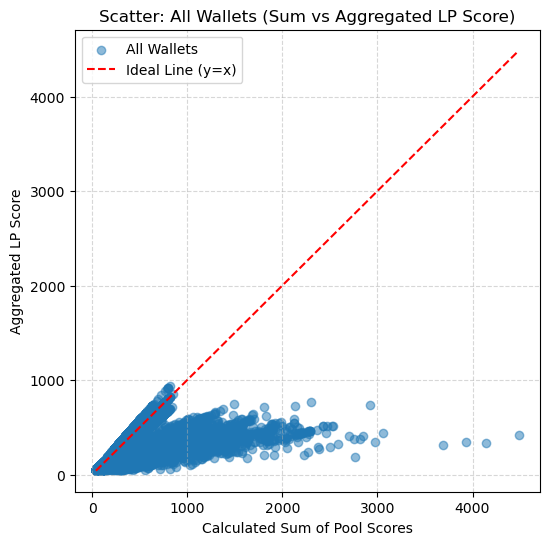

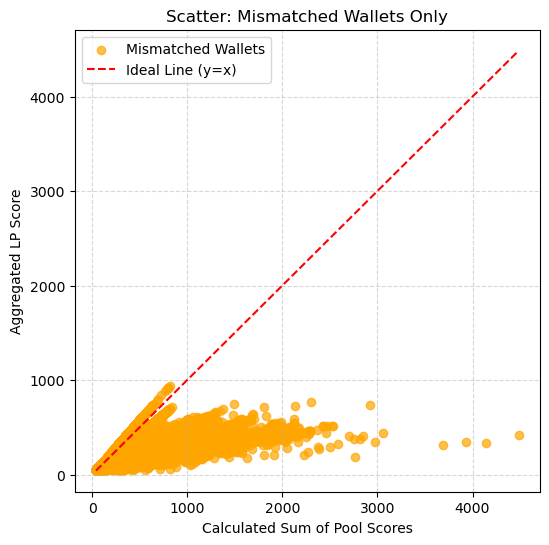

In [14]:
# Scatter plot for all wallets
plt.figure(figsize=(6,6))
plt.scatter(df["calculated_agg_score"], df["aggregated_lp_score"], 
            alpha=0.5, label="All Wallets")
plt.plot([df["calculated_agg_score"].min(), df["calculated_agg_score"].max()],
         [df["calculated_agg_score"].min(), df["calculated_agg_score"].max()],
         color='red', linestyle='--', label="Ideal Line (y=x)")
plt.xlabel("Calculated Sum of Pool Scores")
plt.ylabel("Aggregated LP Score")
plt.title("Scatter: All Wallets (Sum vs Aggregated LP Score)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.savefig("scatter_all_wallets.png", dpi=300)
plt.show()

## Scatter plot for mismatched wallets only ---
plt.figure(figsize=(6,6))
plt.scatter(mismatched_wallets["calculated_agg_score"], 
            mismatched_wallets["aggregated_lp_score"], 
            alpha=0.7, color="orange", label="Mismatched Wallets")
plt.plot([df["calculated_agg_score"].min(), df["calculated_agg_score"].max()],
         [df["calculated_agg_score"].min(), df["calculated_agg_score"].max()],
         color='red', linestyle='--', label="Ideal Line (y=x)")
plt.xlabel("Calculated Sum of Pool Scores")
plt.ylabel("Aggregated LP Score")
plt.title("Scatter: Mismatched Wallets Only")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.savefig("scatter_mismatched_wallets.png", dpi=300)
plt.show()


From the scatter plots we see that the company’s `aggregated_lp_score` is not the same as just adding up all pool scores.
Most wallets have a lower aggregated score than the calculated sum.
This means the company is using some extra rules or weights while calculating the final LP score.

## Part D  -- Reconstruction & Analysis

count    44975.000000
mean         0.853921
std          0.211643
min          0.067689
1%           0.239906
5%           0.401865
50%          0.850000
95%          1.000000
99%          1.150000
max          1.150000


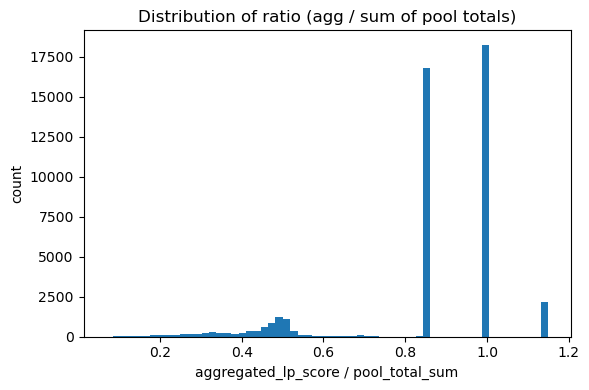

In [15]:
## Ratio diagnostic (aggregated ÷ sum of pool totals)
eps = 1e-9
df['ratio_agg_over_sum'] = df['aggregated_lp_score'] / (df['pool_total_sum'] + eps)
print(df['ratio_agg_over_sum'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).to_string())
plt.figure(figsize=(6,4))
plt.hist(df['ratio_agg_over_sum'].replace([np.inf, -np.inf], np.nan).dropna(), bins=60)
plt.xlabel('aggregated_lp_score / pool_total_sum')
plt.ylabel('count')
plt.title('Distribution of ratio (agg / sum of pool totals)')
plt.tight_layout()
plt.savefig('ratio_agg_over_sum_hist.png', dpi=300)
plt.show()


The ratio analysis shows that in most cases, the **aggregated LP score is about 85% of the total pool sum**. A large group of wallets align closely at exactly 1.0 (perfect match), while a small fraction go slightly higher (up to 1.15). This indicates that the aggregated score is **not just a raw sum** of pool scores, but rather a **scaled or adjusted version of it**


Bucket counts:
 ratio < 0.8 : 7769
 0.8–0.9     : 16803
 0.9–1.0     : 18253
 > 1.0       : 2150
 ~exact 1.0  : 18249


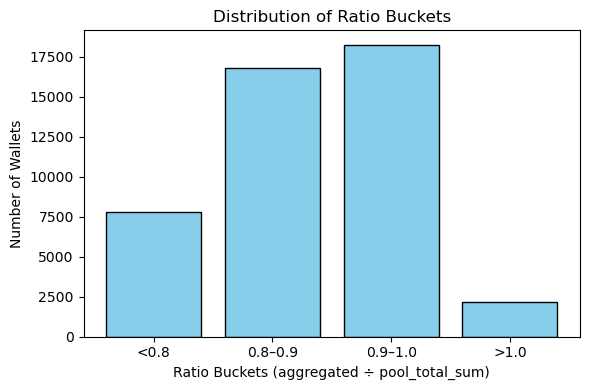

In [16]:
##Ratio Bucket Analysis (aggregated ÷ sum of pool totals)
r = df['ratio_agg_over_sum']
print("\nBucket counts:")
print(" ratio < 0.8 :", (r < 0.8).sum())
print(" 0.8–0.9     :", ((r >= 0.8) & (r < 0.9)).sum())
print(" 0.9–1.0     :", ((r >= 0.9) & (r <= 1.0)).sum())
print(" > 1.0       :", (r > 1.0).sum())
tol = 1e-6
print(" ~exact 1.0  :", (r.sub(1).abs() < tol).sum())

bucket_labels = ["<0.8", "0.8–0.9", "0.9–1.0", ">1.0"]
bucket_counts = [
    (r < 0.8).sum(),
    ((r >= 0.8) & (r < 0.9)).sum(),
    ((r >= 0.9) & (r <= 1.0)).sum(),
    (r > 1.0).sum()
]

plt.figure(figsize=(6,4))
plt.bar(bucket_labels, bucket_counts, color="skyblue", edgecolor="black")
plt.xlabel("Ratio Buckets (aggregated ÷ pool_total_sum)")
plt.ylabel("Number of Wallets")
plt.title("Distribution of Ratio Buckets")
plt.tight_layout()
plt.savefig("ratio_bucket_distribution.png", dpi=300)
plt.show()

here we applied Ratio bucket analysis to check how aggregated scores compare to pool sums across different ranges
- **~41% wallets** are exact matches `(ratio ≈ 1)`
- **~37% wallets** fall in `0.8–0.9`, meaning scores are scaled down.
- **17% wallets** are `<0.8 `(strong attenuation)
- **Only ~5% wallets** are `>1.0 `(boosted) 
-**percentage calculation** =bucketcount /total wallets * 100

from this we conclude that The aggregated score is not always a pure sum. Most wallets are either exact or scaled down (around 0.85), showing that normalization/weighting is applied in LP v4.

Slope (a): 0.361
Intercept (b): 161.43
R²: 0.403 | RMSE: 107.9


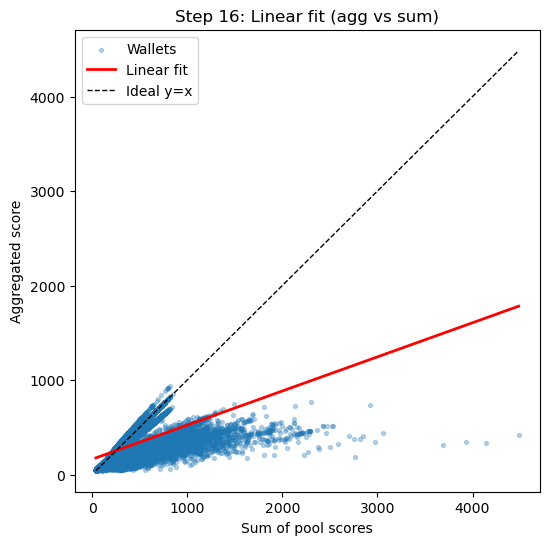

In [17]:
# Linear fit: aggregated ≈ a * sum + b
# X = pool score sum, y = aggregated score
X = df[['pool_total_sum']].fillna(0).values
y = df['aggregated_lp_score'].fillna(0).values
model_sum = LinearRegression().fit(X, y)
y_pred = model_sum.predict(X)
# Metrics
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = model_sum.score(X, y)
print(f"Slope (a): {model_sum.coef_[0]:.3f}")
print(f"Intercept (b): {model_sum.intercept_:.2f}")
print(f"R²: {r2:.3f} | RMSE: {rmse:.1f}")
# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(df['pool_total_sum'], df['aggregated_lp_score'], alpha=0.3, s=8, label="Wallets")
xs = np.linspace(df['pool_total_sum'].min(), df['pool_total_sum'].max(), 200)
plt.plot(xs, model_sum.coef_[0]*xs + model_sum.intercept_, 'r-', lw=2, label="Linear fit")
plt.plot(xs, xs, 'k--', lw=1, label="Ideal y=x")
plt.xlabel("Sum of pool scores")
plt.ylabel("Aggregated score")
plt.title("Step 16: Linear fit (agg vs sum)")
plt.legend()
plt.savefig("Linear fit.png", dpi=300)
plt.show()


here we applied Linear fit: aggregated ≈ a * sum + b   to check if the aggregated LP score can be explained as a linear function of the sum of pool scores.

 **Results**

- **Slope (a): 0.361**-shows that aggregated scores are scaled down compared to raw pool sums.
- **Intercept (b): 161.43**- means even wallets with small pool sums get a baseline boost
- **R² (fit quality): 0.403**- it indicates that the fit captures only part of the variation — so other factors (weights, normalization) are also affecting aggregated scores


 from this we conclude that indicates that the fit captures only part of the variation — so other factors (weights, normalization) are also affecting aggregated scores

In [18]:
# Step 17 — Per-pool weighted fit: aggregated ≈ Σ w_i * pool_i
pool_total_cols = [f'lp_scores[{i}].total_score' for i in range(13) if f'lp_scores[{i}].total_score' in df.columns]
Xp = df[pool_total_cols].replace([np.inf, -np.inf], np.nan).fillna(0).values
yp = df['aggregated_lp_score'].replace([np.inf, -np.inf], np.nan).fillna(0).values
lin_pools = LinearRegression()
lin_pools.fit(Xp, yp)
yp_pred = lin_pools.predict(Xp)

rmse_pools = np.sqrt(mean_squared_error(yp, yp_pred))
r2_pools = lin_pools.score(Xp, yp)

print(f"Per-pool linear fit → R^2: {r2_pools:.4f} | RMSE: {rmse_pools:.2f}")
print("Estimated weights per pool index:")
for i, col in enumerate(pool_total_cols):
    print(f"  weight for {col}: {lin_pools.coef_[i]:.6f}")
print(f"Intercept: {lin_pools.intercept_:.6f}")
w_series = pd.Series(lin_pools.coef_, index=pool_total_cols).abs().sort_values(ascending=False)
print("\nTop 5 pools by |weight| influence:")
print(w_series.head(5))


Per-pool linear fit → R^2: 0.8437 | RMSE: 55.21
Estimated weights per pool index:
  weight for lp_scores[0].total_score: 0.821707
  weight for lp_scores[1].total_score: 0.159881
  weight for lp_scores[2].total_score: -0.000486
  weight for lp_scores[3].total_score: -0.032329
  weight for lp_scores[4].total_score: -0.046155
  weight for lp_scores[5].total_score: -0.053052
  weight for lp_scores[6].total_score: -0.120337
  weight for lp_scores[7].total_score: 0.028301
  weight for lp_scores[8].total_score: 0.079963
  weight for lp_scores[9].total_score: 0.216029
  weight for lp_scores[10].total_score: -0.444038
  weight for lp_scores[11].total_score: -0.052128
  weight for lp_scores[12].total_score: 0.000000
Intercept: 31.039882

Top 5 pools by |weight| influence:
lp_scores[0].total_score     0.821707
lp_scores[10].total_score    0.444038
lp_scores[9].total_score     0.216029
lp_scores[1].total_score     0.159881
lp_scores[6].total_score     0.120337
dtype: float64




- In this step, we checked if the aggregated LP score is a **weighted sum of pool scores**.  
- The model gave **R² = 0.844** and **RMSE = 55.2**, which is much better than the simple linear fit(applied in previous step ) .  
- Results show that different pools have **different weights**:
  - Pool 0 has the highest positive weight (~0.82).  
  - Pool 10 has a strong negative weight (~-0.44).  
  - Pools 9, 1, and 6 also play notable roles.  

from this wee conclude that:
The aggregated LP score is not a simple sum but a **weighted combination of pool scores**, where some pools increase the score and others reduce it.


In [19]:
## Fit comparison by number of pools
def compute_fit_metrics(sub):
    if len(sub) < 30:
        return {'n': len(sub), 'a': np.nan, 'b': np.nan, 'R2': np.nan, 'RMSE': np.nan}
    Xs = sub[['pool_total_sum']].fillna(0).values
    ys = sub['aggregated_lp_score'].fillna(0).values
    m = LinearRegression().fit(Xs, ys)
    yhat = m.predict(Xs)
    return {
        'n': len(sub),
        'a': float(m.coef_[0]),
        'b': float(m.intercept_),
        'R2': float(m.score(Xs, ys)),
        'RMSE': float(np.sqrt(mean_squared_error(ys, yhat)))
    }

results = {}
for k in [1, 2, 3, 4, '>4']:
    if k == '>4':
        subset = df[df['num_pools_present'] > 4]
        label = 'wallets with >4 pools'
    else:
        subset = df[df['num_pools_present'] == k]
        label = f'wallets with {k} pools'
    results[label] = compute_fit_metrics(subset)

print("\nFit comparison by number of pools:")
print(pd.DataFrame(results).T)


Fit comparison by number of pools:
                             n         a           b        R2       RMSE
wallets with 1 pools   36337.0  0.920555    3.385702  0.954883  30.188465
wallets with 2 pools    6739.0  0.428749   35.669892  0.816393  53.728085
wallets with 3 pools    1425.0  0.299313   27.035265  0.773429  57.080993
wallets with 4 pools     333.0  0.240798    7.743555  0.779259  57.459244
wallets with >4 pools    141.0  0.104746  132.332811  0.411541  83.430463


here we Check how the linear relation between `sum of pool scores` and `aggregated score` changes depending on how many pools a wallet participates in.

 **from output :**
 - **1 Pool:**  
  - Slope ≈ 0.92, Intercept ≈ 3.4  
  - **R² ≈ 0.95, RMSE ≈ 30**  
  - Almost a direct scaled version of the pool score.  

- **2–4 Pools:**  
  - Slopes drop (0.43 → 0.24).  
  - **R² ~ 0.77–0.82, RMSE ~ 54–57**  
  - Aggregated score grows more slowly than pool sums, showing attenuation.  

- **>4 Pools:**  
  - Slope ≈ 0.10, Intercept ≈ 132  
  - **R² ≈ 0.41, RMSE ≈ 83** 
  -  **R² ≈ 0.41, RMSE ≈ 83**  
  - Very weak linear relationship; strong normalization/penalty applied.
  
  

from above result we conclude that :
  
- For **single-pool wallets**, aggregated scores are almost a simple scaled sum.  
- For **multi-pool wallets**, the relationship weakens, with **diminishing returns** as the number of pools increases.  
- This confirms that LP v4 scoring is **not purely additive** but introduces **normalization across pools**.

In [20]:
## Deposit deciles vs aggregated score
## deciles-- 0 (lowest deposits) --9 (highest)
dep = df['agg_total_deposit'].fillna(0)
df['dep_decile'] = pd.qcut(dep.rank(method='first'), 10, labels=False)
## per-decile median aggregated score
med_by_decile = df.groupby('dep_decile')['aggregated_lp_score'].median()
print("Median aggregated score by deposit decile:\n", med_by_decile)
# quick monotonicity check (does median ever drop when decile increases?)
drops = []
vals = med_by_decile.tolist()
for i in range(1, len(vals)):
    if vals[i] < vals[i-1] - 1e-9:
        drops.append((i-1, i, vals[i-1], vals[i]))

print("\nMonotonicity breaks (i -> i+1 where median drops):")
print(drops if drops else "None")


Median aggregated score by deposit decile:
 dep_decile
0     62.000
1    270.300
2    278.800
3    286.760
4    288.735
5    292.820
6    312.000
7    325.550
8    330.650
9    362.950
Name: aggregated_lp_score, dtype: float64

Monotonicity breaks (i -> i+1 where median drops):
None


In this step, we divided wallets into `10 deciles` based on their total deposits:

- **Decile 0** → wallets with the lowest deposits
- **Decile 9**→ wallets with the highest deposits
- For each decile, we calculated the `median aggregated LP score.`
- **monotonicity check**- median does not decrease as deposits increase mean no  break found

From this analysis, we confirm that:
- Higher deposit deciles correspond to higher aggregated scores  and more deposits consistently lead to higher LP scores.
- This shows that deposit size is a key driver of the aggregated LP score


In [21]:
## Retention vs retention_score vs aggregated

# pool-level columns
pct_cols   = [c for c in df.columns if c.endswith('.liquidity_percent_remaining')]
score_cols = [c for c in df.columns if c.endswith('.score_breakdown.liquidity_retention_score')]

## wallet summaries
df['retention_pct_mean']   = df[pct_cols].mean(axis=1, skipna=True)
df['retention_score_total'] = df[score_cols].sum(axis=1, skipna=True)

## bucket wallets into quintiles by retention %
df['ret_quintile'] = pd.qcut(df['retention_pct_mean'], 5, duplicates='drop')

summary = (
    df
    .groupby('ret_quintile')
    .agg(median_retention_pct=('retention_pct_mean', 'median'),
         median_retention_score=('retention_score_total', 'median'),
         median_agg_score=('aggregated_lp_score', 'median'),
         n=('wallet_id', 'count'))
    .reset_index()
)

print("Retention cohorts (quintiles):")
print(summary)


Retention cohorts (quintiles):
        ret_quintile  median_retention_pct  median_retention_score  median_agg_score      n
0  (-0.001, 0.00624]              0.000000                     0.0            257.55  26985
1   (0.00624, 0.214]              0.049359                     0.0            295.00   8995
2       (0.214, 1.0]              0.901011                   150.0            479.69   8995


in this step We grouped wallets into **quintiles (5 buckets)** based on their **mean liquidity retention %**
Then, for each bucket, we calculated:
- **Median retention %**
- **Median retention score**
- **Median aggregated LP score**
- **Number of wallets**

from the above results we conclude that :

- Wallets with **low or near-zero liquidity retention** get **zero retention score**, keeping their aggregated score lower (~260–295).
- Wallets with **high retention (around 90%)** get **positive retention scores (~150)** and significantly higher aggregated scores (~480).
- so, **liquidity retention is directly rewarded in LP v4 scoring** — higher retention % strongly boosts the aggregated LP score

In [22]:
## Volatility & dust influence (correlations)

vol_cols  = [c for c in df.columns if c.endswith('.lp_volatility_stddev')]
dust_n    = [c for c in df.columns if c.endswith('.dust_deposit_count')]
dust_vol  = [c for c in df.columns if c.endswith('.dust_deposit_volume')]

df['vol_std_mean']  = df[vol_cols].mean(axis=1,  skipna=True)
df['dust_count_sum'] = df[dust_n].sum(axis=1,    skipna=True)
df['dust_vol_sum']   = df[dust_vol].sum(axis=1,  skipna=True)

corr_vol  = df['aggregated_lp_score'].corr(df['vol_std_mean'])
corr_dcnt = df['aggregated_lp_score'].corr(df['dust_count_sum'])
corr_dvol = df['aggregated_lp_score'].corr(df['dust_vol_sum'])

print("Correlations with aggregated_lp_score:")
print(f"  volatility (mean std): {corr_vol:.4f}")
print(f"  dust count (sum)     : {corr_dcnt:.4f}")
print(f"  dust volume (sum)    : {corr_dvol:.4f}")


Correlations with aggregated_lp_score:
  volatility (mean std): 0.0182
  dust count (sum)     : -0.0019
  dust volume (sum)    : 0.0022


in this step we check We checked how **volatility and dust deposit**   affect the aggregated LP score by checking correlations.
- **from output  we get :**
- Volatility (mean std): `+0.018` (almost no effect)
- Dust count (sum): `-0.002` (negligible negative effect)
- Dust volume (sum): `+0.002` (negligible effect)

**from this observations we conclude that :**

The correlations are nearly zero. This confirms that `aggregated LP scores are not influenced by volatility or dust deposits`, meaning the LP v4 scoring model is `robust against noise`

In [23]:
## Anomaly Detection (single-cell, polished)
eps = 1e-9
## Ensure numeric types 
num_cols = ['aggregated_lp_score','calculated_agg_score','pool_total_sum',
            'agg_total_deposit','cat_breakdown_sum','retention_pct_mean']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

## Build fields if missing
if 'pool_total_sum' not in df.columns:
    pool_total_cols = [c for c in df.columns if c.endswith('.total_score')]
    df['pool_total_sum'] = df[pool_total_cols].sum(axis=1, skipna=True)

if 'agg_total_deposit' not in df.columns:
    dep_cols = [c for c in df.columns if 'total_deposit_all_time' in c]
    df['agg_total_deposit'] = df[dep_cols].fillna(0).sum(axis=1) if dep_cols else 0

cat_cols = ['lp_category_breakdown.stable-stable',
            'lp_category_breakdown.stable-volatile',
            'lp_category_breakdown.volatile-volatile']
if all(c in df.columns for c in cat_cols) and 'cat_breakdown_sum' not in df.columns:
    df['cat_breakdown_sum'] = df[cat_cols].sum(axis=1)

ret_pct_cols = [c for c in df.columns if c.endswith('.liquidity_percent_remaining')]
if 'retention_pct_mean' not in df.columns and ret_pct_cols:
    df['retention_pct_mean'] = df[ret_pct_cols].mean(axis=1, skipna=True)

## Reconstructed aggregated (sum of per-pool total score)
if 'calculated_agg_score' not in df.columns:
    pool_total_cols2 = [f"lp_scores[{i}].score_breakdown.total_score"
                        for i in range(13)
                        if f"lp_scores[{i}].score_breakdown.total_score" in df.columns]
    df['calculated_agg_score'] = df[pool_total_cols2].sum(axis=1, skipna=True)

df['diff_agg'] = df['aggregated_lp_score'] - df['calculated_agg_score']
agg_median = float(df['aggregated_lp_score'].median())

##  Rules

## R1 -  aggregation mismatch (>= 50 points)
R1 = df[df['diff_agg'].abs() >= 50].copy()
R1['reason'] = 'R1: |agg - sum_of_pools| >= 50'
R1['metric'] = 'diff_agg'
R1['value']  = R1['diff_agg']
R1['threshold'] = 50

## R2 -  top-deposit (p90+) but below-median aggregated score
top_dep_cut = df['agg_total_deposit'].quantile(0.90)
R2 = df[(df['agg_total_deposit'] >= top_dep_cut) & (df['aggregated_lp_score'] < agg_median)].copy()
R2['reason'] = 'R2: top-10% deposit, but below-median score'
R2['metric'] = 'agg_total_deposit'
R2['value']  = R2['agg_total_deposit']
R2['threshold'] = f'>= p90 ({top_dep_cut:.2f}) & agg < median ({agg_median:.2f})'

## R3-  high retention% but low score
if 'retention_pct_mean' in df.columns:
    R3 = df[(df['retention_pct_mean'] >= 0.80) & (df['aggregated_lp_score'] < agg_median)].copy()
    R3['reason'] = 'R3: retention >= 80% but agg < median'
    R3['metric'] = 'retention_pct_mean'
    R3['value']  = R3['retention_pct_mean']
    R3['threshold'] = '>= 0.80 & agg < median'
else:
    R3 = df.iloc[0:0].copy()

## R4-  category sum vs aggregated mismatch (>= 50) — value = absolute gap (polish)
if 'cat_breakdown_sum' in df.columns:
    cat_gap_abs = (df['cat_breakdown_sum'] - df['aggregated_lp_score']).abs()
    R4 = df[cat_gap_abs >= 50].copy()
    R4['reason'] = 'R4: |category_sum - aggregated| >= 50'
    R4['metric'] = 'cat_sum_minus_agg'
    R4['value']  = cat_gap_abs  # absolute value (clearer)
    R4['threshold'] = 50
else:
    R4 = df.iloc[0:0].copy()

##Combine all anomalies 
anoms = pd.concat([R1, R2, R3, R4], ignore_index=True)

## Final output table 
out = anoms[['wallet_id']].copy()
out['pool_id']   = np.nan  # placeholder (optional)
out['reason']    = anoms['reason'].values
out['metric']    = anoms['metric'].values
out['value']     = anoms['value'].values
out['threshold'] = anoms['threshold'].values
out['aggregated_lp_score']   = anoms['aggregated_lp_score'].values
out['calculated_agg_score']  = anoms['calculated_agg_score'].values

## Clean index and preview
out = out.reset_index(drop=True)
print("Total anomalies:", len(out))
print("\nBreakdown by reason:")
print(out['reason'].value_counts())
display(out.head(10))

## Save CSV (deliverable)
out.to_csv('anomalies.csv', index=False)
print("\nSaved: anomalies.csv")


Total anomalies: 33569

Breakdown by reason:
reason
R1: |agg - sum_of_pools| >= 50                 17188
R4: |category_sum - aggregated| >= 50          15386
R2: top-10% deposit, but below-median score      992
R3: retention >= 80% but agg < median              3
Name: count, dtype: int64


,wallet_id,pool_id,reason,metric,value,threshold,aggregated_lp_score,calculated_agg_score
0,0x00d4c206ae699d5d2bf19a542a544276dc50889c,NaN,R1: |agg - sum_of_pools| >= 50,diff_agg,-131.44,50,296.56,428.0
1,0x0052830c57696794e3999ed44dd2bb20d286a19b,NaN,R1: |agg - sum_of_pools| >= 50,diff_agg,-60.30,50,341.70,402.0
2,0x00fdeb61315dffc6a1b083497e39c67be68c5b59,NaN,R1: |agg - sum_of_pools| >= 50,diff_agg,-96.30,50,545.70,642.0
3,0x002fe502a3c31fb20340829cee70d95f5f85a535,NaN,R1: |agg - sum_of_pools| >= 50,diff_agg,-199.30,50,213.70,413.0
4,0x00ad6e4fa0df43410cba667c6a7768e123dbf480,NaN,R1: |agg - sum_of_pools| >= 50,diff_agg,-79.65,50,451.35,531.0
5,0x0079847320e894982cfd50b665c15b329cb33806,NaN,R1: |agg - sum_of_pools| >= 50,diff_agg,-69.90,50,396.10,466.0
6,0x003b810c511360f169fc55d5c8e6e8f4f4410caf,NaN,R1: |agg - sum_of_pools| >= 50,diff_agg,-310.19,50,317.81,628.0
7,0x0076256425954d097a4003fa46d731f895cfa829,NaN,R1: |agg - sum_of_pools| >= 50,diff_agg,-283.24,50,255.76,539.0
8,0x01261d70f00de0928f1893f285af239d69b4de14,NaN,R1: |agg - sum_of_pools| >= 50,diff_agg,-303.89,50,286.11,590.0
9,0x00165089dcf7b9fa63955085a46844eecf8177e1,NaN,R1: |agg - sum_of_pools| >= 50,diff_agg,-75.60,50,428.40,504.0



Saved: anomalies.csv


in this step We applied rule-based anomaly checks to identify wallets where the aggregated LP score looked inconsistent.

**4 simple rule applied**
- **R1:** Big gap between aggregated and pool sum (≥50).
- **R2:** Top depositors but low score.
- **R3:** High retention but low score.
- **R4:** Big gap between category sum and aggregated (≥50).
- **output**
-  Total anomalies: 33569
-  R1: 17188, R4: 15386, R2: 992, R3: 3


from above conclusion we can say that: Most anomalies come from aggregation mismatches (R1 & R4), suggesting that the scoring system applies hidden normalization or weighting beyond a simple pool sum. Very few cases (R2, R3) show possible business-level concerns where important liquidity providers may be undervalued.

In [24]:
##  COMPONENT CONSISTENCY ACROSS POOLS
## Collect frequency columns for all 13 pools
freq_cols = [f'lp_scores[{i}].num_deposits_used_in_frequency' for i in range(13) if f'lp_scores[{i}].num_deposits_used_in_frequency' in df.columns]
freq_score_cols = [f'lp_scores[{i}].score_breakdown.deposit_frequency_score' for i in range(13) if f'lp_scores[{i}].score_breakdown.deposit_frequency_score' in df.columns]

## Stack pool-wise into long form  where only the rows where both freq & score exist
rows = []
for i in range(13):
    fcol = f'lp_scores[{i}].num_deposits_used_in_frequency'
    scol = f'lp_scores[{i}].score_breakdown.deposit_frequency_score'
    if fcol in df.columns and scol in df.columns:
        tmp = df[[fcol, scol]].rename(columns={fcol:'freq_used', scol:'freq_score'})
        tmp['pool_idx'] = i
        rows.append(tmp)

long = pd.concat(rows, ignore_index=True).dropna(subset=['freq_used','freq_score'])
## Bucket frequency (0,1,2-3,4-6,7+)
bins = [-1,0,1,3,6,1e9]
labels = ['0','1','2-3','4-6','7+']
long['freq_bucket'] = pd.cut(long['freq_used'], bins=bins, labels=labels)

consistency = long.groupby('freq_bucket').agg(
    n=('freq_score','count'),
    median_score=('freq_score','median'),
    p25=('freq_score', lambda x: np.percentile(x, 25)),
    p75=('freq_score', lambda x: np.percentile(x, 75))
).reset_index()

print("Deposit frequency → score consistency (across pools):")
print(consistency)


Deposit frequency → score consistency (across pools):
  freq_bucket      n  median_score    p25    p75
0           0   2670         100.0  100.0  100.0
1           1  21071           0.0    0.0    0.0
2         2-3  15323          22.0    0.0   22.0
3         4-6   8044          50.0   14.0   77.0
4          7+   9102          89.0   25.0  100.0


here we check if `deposit frequency` aligns with the `deposit_frequency_score` across pools

- Wallets with `0 deposits` get a `default score of 100`
- Wallets with `1 deposit` usually get `0 score`
- With `2–3 deposits`, scores rise to `about 22`
- With `4–6 deposits`, scores are `around 50`
- With `7+ deposits`, scores are `close to 90–100`

This shows a clear pattern : `more deposits = higher score`.
it means Scores rise steadily as frequency increases, which shows consistency in how deposit frequency is converted to scores.The scoring system is behaving logically and consistently across pools.


In [25]:
## TEMPORAL ODDITIES
## Gather last_tx across pools → wallet-level most recent activity
last_cols = [f'lp_scores[{i}].last_tx_timestamp' for i in range(13) if f'lp_scores[{i}].last_tx_timestamp' in df.columns]
def to_dt(s):
    # robust parse (ISO-like)
    try:
        return pd.to_datetime(s, errors='coerce', utc=True)
    except:
        return pd.NaT

if last_cols:
    last_dt = df[last_cols].applymap(to_dt)
    df['last_tx_most_recent'] = last_dt.max(axis=1)
else:
    df['last_tx_most_recent'] = pd.NaT

## relative to latest date seen in dataset
ref_date = pd.to_datetime(df['last_tx_most_recent'].max())
df['stale_days'] = (ref_date - df['last_tx_most_recent']).dt.days

print("Staleness summary (days since last tx, wallet most recent):")
print(df['stale_days'].describe(percentiles=[0.5,0.9,0.99]).to_string())

## Flag: very stale but still high score
stale_cut = df['stale_days'].quantile(0.95)  
high_cut  = df['aggregated_lp_score'].quantile(0.90)  
stale_high = df[(df['stale_days'] >= stale_cut) & (df['aggregated_lp_score'] >= high_cut)][['_id','wallet_id','stale_days','aggregated_lp_score']]
print("\nVery stale & high score wallets (possible temporal oddity):", len(stale_high))
display(stale_high.head(10))


Staleness summary (days since last tx, wallet most recent):
count    44975.000000
mean       579.050695
std        399.043666
min          0.000000
50%        425.000000
90%       1140.000000
99%       1441.000000
max       1467.000000

Very stale & high score wallets (possible temporal oddity): 198


,_id,wallet_id,stale_days,aggregated_lp_score
63,6874b820a794db5e6c4c2de1,0x0009d32184afc79797ec63589e62ad5b53134aad,1360,628.0
90,6874b821a794db5e6c4c2def,0x00f051cb90271d686e2cb9b6e2962579b6d68033,1377,601.0
105,6874b820a794db5e6c4c2dc9,0x007de1a424c4076fb8c2aafb3d3bfb22e3824303,1397,598.0
268,6874b831a794db5e6c4c30d0,0x02b860783d1957f9dc0870185b8bf7714eed9604,1409,578.0
316,6874b82ba794db5e6c4c2fca,0x014d02185b7da9655367dff0cfa528ed755dd402,1466,589.0
406,6874b830a794db5e6c4c30a5,0x02ac3df272eb15093ecbea70253d8de4c5d4de9e,1397,596.0
791,6874b843a794db5e6c4c33e0,0x046d349a609f57482f8fa411ea5c7b9963bd996c,1393,587.0
1196,6874b850a794db5e6c4c36a1,0x05606123d385deb2d7069421af2376603a326e2b,1412,761.0
1308,6874b85ea794db5e6c4c389e,0x07379370e6900e539e5789bdd79dbf74253c290f,1404,693.0
1627,6874b873a794db5e6c4c3ce1,0x09f8c7d1813347ebb176ac109a1f361c1989777f,1466,588.0


here we We calculated how long it has been since each wallet’s last transaction.
For each wallet, I took the most recent `last_tx_timestamp` across all pools.Computed` stale_days` = (latest date in dataset) − (wallet’s most recent tx).
Flagged wallets that are **very stale** (top 5% by `stale_days`) but still have a **high score** (top 10% by `aggregated_lp_score`).

- Median inactivity is ~425 days, with some wallets inactive for over 1400 days.
- 198 wallets are flagged as unusual: they are very stale but still hold high LP score

This shows that the scoring model does not fully reduce scores for inactive wallets, leading to potential inconsistencies.

In [26]:
## DATA QUALITY AUDIT
## Duplicate wallet_id + pool_id pairs
pool_id_cols = [f'lp_scores[{i}].pool_id' for i in range(13) if f'lp_scores[{i}].pool_id' in df.columns]
dupe_rows = []
for i in range(13):
    pcol = f'lp_scores[{i}].pool_id'
    if pcol in df.columns:
        sub = df[['wallet_id', pcol]].dropna()
        sub = sub.rename(columns={pcol:'pool_id'})
        sub['pool_idx'] = i
        dupe_rows.append(sub)

pairs = pd.concat(dupe_rows, ignore_index=True)
dup_counts = pairs.duplicated(subset=['wallet_id','pool_id']).sum()
print("Duplicate (wallet_id, pool_id) pairs:", dup_counts)

## Empty token symbols
tok0 = [f'lp_scores[{i}].token_symbols[0]' for i in range(13) if f'lp_scores[{i}].token_symbols[0]' in df.columns]
tok1 = [f'lp_scores[{i}].token_symbols[1]' for i in range(13) if f'lp_scores[{i}].token_symbols[1]' in df.columns]

def blank_count(cols):
    if not cols: return 0
    tmp = df[cols].astype(str).apply(lambda s: s.str.strip()).replace({'nan': ''})
    return (tmp == '').sum().sum()

print("Blank token symbol entries (sum over both legs):", blank_count(tok0) + blank_count(tok1))

## Impossible negatives in key behavior fields 
bad_neg_cols = [c for c in df.columns if any(x in c for x in ['num_deposits','num_withdrawals','dust_deposit_count'])]
neg_any = df[bad_neg_cols].lt(0).sum().sum()
print("Negative counts across deposit/withdraw/dust columns:", int(neg_any))


Duplicate (wallet_id, pool_id) pairs: 0
Blank token symbol entries (sum over both legs): 1058041
Negative counts across deposit/withdraw/dust columns: 0


- Duplicates on `(wallet_id, pool_id)`: **0**
- Blank token symbol entries (leg 0 + leg 1): **1,058,041** *(mostly unused pool slots)*
- Negative counts (deposits/withdrawals/dust): **0**
- DATA -ALL GOOD